In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [3]:
customers = pd.read_csv('data/customers.csv')
sales_data = pd.read_csv('data/sales_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'data/customers.csv'

In [5]:
customers = pd.read_csv('customers.csv')
sales_data = pd.read_csv('sales_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'customers.csv'

In [7]:
customers = pd.read_csv('customers.csv')
sales_data = pd.read_csv('sales_data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'customers.csv'

In [9]:
customers = pd.read_csv('C:\Users\91770\Desktop\Data_Analysis_Assignment\data\customers.csv')
sales_data = pd.read_csv('C:\Users\91770\Desktop\Data_Analysis_Assignment\data\sales_data.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1063529446.py, line 1)

In [11]:
customers = pd.read_csv(r'C:\Users\91770\Desktop\Data_Analysis_Assignment\data\customers.csv')
sales_data = pd.read_csv(r'C:\Users\91770\Desktop\Data_Analysis_Assignment\data\sales_data.csv')


In [13]:
print(customers.head())
print(sales_data.head())


   customer_id  total_spend  num_orders last_order_date
0         1001  8072.510788          14      2023-05-28
1         1002  4295.331083          39      2023-09-06
2         1003  9527.625896          10      2023-05-10
3         1004  4760.739090          46      2023-03-06
4         1005  6070.383831          45      2023-06-24
   order_id product_name category  order_date     revenue   region
0         1      Chicken     Meat  2023-12-05  443.177076     West
1         2         Eggs    Dairy  2023-09-30  263.980108  Central
2         3   Vegetables     Meat  2023-03-03   57.065403    South
3         4       Fruits    Dairy  2023-02-01  137.527289     East
4         5         Eggs   Bakery  2023-07-20  290.176776    South


In [15]:
print(customers.info())
print(sales_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   total_spend      1000 non-null   float64
 2   num_orders       1000 non-null   int64  
 3   last_order_date  1000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      5000 non-null   int64  
 1   product_name  5000 non-null   object 
 2   category      5000 non-null   object 
 3   order_date    5000 non-null   object 
 4   revenue       5000 non-null   float64
 5   region        5000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB
None


In [17]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])


In [19]:
print(customers.head())
print(sales_data.head())


   customer_id  total_spend  num_orders last_order_date
0         1001  8072.510788          14      2023-05-28
1         1002  4295.331083          39      2023-09-06
2         1003  9527.625896          10      2023-05-10
3         1004  4760.739090          46      2023-03-06
4         1005  6070.383831          45      2023-06-24
   order_id product_name category order_date     revenue   region
0         1      Chicken     Meat 2023-12-05  443.177076     West
1         2         Eggs    Dairy 2023-09-30  263.980108  Central
2         3   Vegetables     Meat 2023-03-03   57.065403    South
3         4       Fruits    Dairy 2023-02-01  137.527289     East
4         5         Eggs   Bakery 2023-07-20  290.176776    South


In [21]:
print(customers.info())
print(sales_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   total_spend      1000 non-null   float64
 2   num_orders       1000 non-null   int64  
 3   last_order_date  1000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      5000 non-null   int64         
 1   product_name  5000 non-null   object        
 2   category      5000 non-null   object        
 3   order_date    5000 non-null   datetime64[ns]
 4   revenue       5000 non-null   float64       
 5   region        5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(

In [23]:
print(sales_data['order_date'].head())


0   2023-12-05
1   2023-09-30
2   2023-03-03
3   2023-02-01
4   2023-07-20
Name: order_date, dtype: datetime64[ns]


In [25]:
# Group sales data by customer_id and aggregate metrics
customer_metrics = sales_data.groupby('customer_id').agg(
    total_spend = ('total_amount', 'sum'),
    order_count = ('order_id', 'count'),
    last_order = ('order_date', 'max')
).reset_index()

# Calculate recency: number of days since the last order
from datetime import datetime
today = datetime.today()
customer_metrics['recency'] = (today - customer_metrics['last_order']).dt.days

print(customer_metrics.head())


KeyError: 'customer_id'

In [27]:
print(sales_data.columns)


Index(['order_id', 'product_name', 'category', 'order_date', 'revenue',
       'region'],
      dtype='object')


In [29]:
orders = pd.read_csv(r'C:\Users\91770\Desktop\Data_Analysis_Assignment\data\orders1.csv')
print(orders.head())
print(orders.columns)


   order_id  customer_id  order_date           city  total_amount
0         1         1102  2023-10-19        Houston     95.433959
1         2         1045  2023-03-10        Chicago    380.831884
2         3         1301  2023-09-26        Houston    126.691659
3         4         1252  2023-03-06        Chicago    324.203999
4         5         1443  2023-08-01  San Francisco    392.898011
Index(['order_id', 'customer_id', 'order_date', 'city', 'total_amount'], dtype='object')


In [31]:
# Aggregate metrics for customer segmentation using orders1.csv
customer_metrics = orders.groupby('customer_id').agg(
    total_spend = ('total_amount', 'sum'),
    order_count = ('order_id', 'count'),
    last_order = ('order_date', 'max')
).reset_index()

from datetime import datetime
today = datetime.today()
customer_metrics['recency'] = (today - pd.to_datetime(customer_metrics['last_order'])).dt.days

print(customer_metrics.head())


   customer_id  total_spend  order_count  last_order  recency
0         1001   841.381178            4  2023-09-12      525
1         1002   706.672405            2  2023-11-17      459
2         1003  1113.836397            3  2023-11-08      468
3         1004   181.897992            1  2023-01-11      769
4         1005  2100.904234            7  2023-08-21      547


Index(['order_id', 'customer_id', 'order_date', 'city', 'total_amount'], dtype='object')
   customer_id  total_spend  order_count last_order  recency
0         1001   841.381178            4 2023-09-12      525
1         1002   706.672405            2 2023-11-17      459
2         1003  1113.836397            3 2023-11-08      468
3         1004   181.897992            1 2023-01-11      769
4         1005  2100.904234            7 2023-08-21      547
cluster
2    495
0    322
1    180
Name: count, dtype: int64


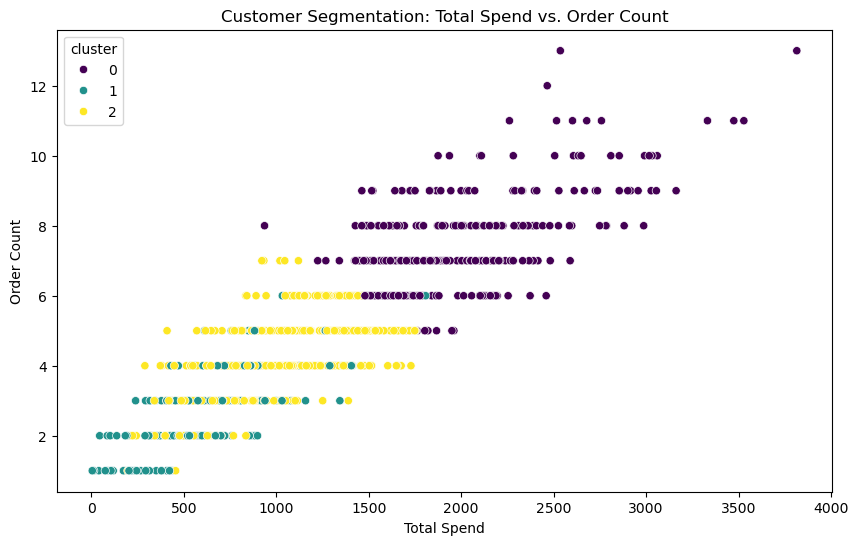

In [33]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load orders1.csv (ensure the path is correct)
orders = pd.read_csv(r'C:\Users\91770\Desktop\Data_Analysis_Assignment\data\orders1.csv')

# Display columns to confirm
print(orders.columns)  # Expected: ['order_id', 'customer_id', 'order_date', 'city', 'total_amount']

# Convert order_date to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Aggregate customer metrics: total spend, order count, and last order date
customer_metrics = orders.groupby('customer_id').agg(
    total_spend=('total_amount', 'sum'),
    order_count=('order_id', 'count'),
    last_order=('order_date', 'max')
).reset_index()

# Calculate recency: days since last order
today = datetime.today()
customer_metrics['recency'] = (today - customer_metrics['last_order']).dt.days

print(customer_metrics.head())

# Prepare features for clustering: total_spend, order_count, and recency
features = customer_metrics[['total_spend', 'order_count', 'recency']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering (e.g., 3 clusters)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
customer_metrics['cluster'] = kmeans.fit_predict(scaled_features)

# Check cluster distribution
print(customer_metrics['cluster'].value_counts())

# Visualize clusters: Total Spend vs. Order Count
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_spend', 
    y='order_count', 
    hue='cluster', 
    data=customer_metrics, 
    palette='viridis'
)
plt.title('Customer Segmentation: Total Spend vs. Order Count')
plt.xlabel('Total Spend')
plt.ylabel('Order Count')
plt.show()


TypeError: Invalid object type at position 0

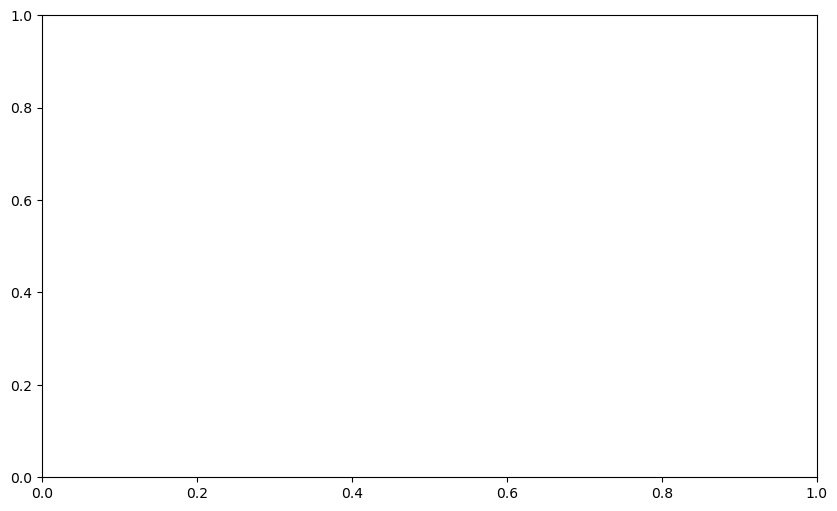

In [35]:
# Extract month and aggregate revenue
orders['order_month'] = orders['order_date'].dt.to_period('M')
monthly_revenue = orders.groupby('order_month')['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='total_amount', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

# Extract day of the week and count orders
orders['order_day'] = orders['order_date'].dt.day_name()
daily_orders = orders['order_day'].value_counts().reset_index()
daily_orders.columns = ['day', 'order_count']

plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='order_count', data=daily_orders, palette='coolwarm')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


In [37]:
# Convert order_date to Period and then to Timestamp
orders['order_month'] = orders['order_date'].dt.to_period('M')
orders['order_month'] = orders['order_month'].dt.to_timestamp()

# Aggregate revenue by month
monthly_revenue = orders.groupby('order_month')['total_amount'].sum().reset_index()


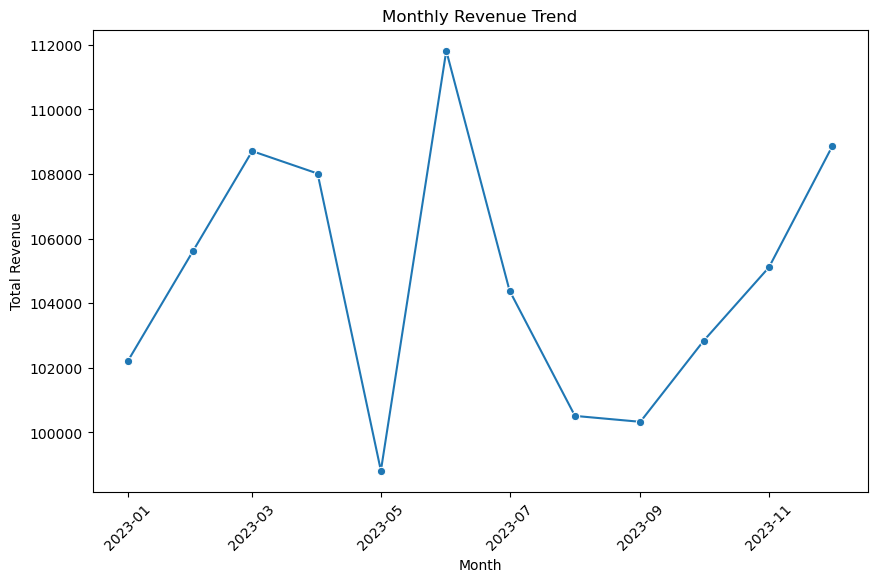

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='total_amount', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Extract the day of the week from order_date
orders['order_day'] = orders['order_date'].dt.day_name()


In [43]:
daily_orders = orders['order_day'].value_counts().reset_index()
daily_orders.columns = ['day', 'order_count']
print(daily_orders)


         day  order_count
0     Friday          767
1   Saturday          729
2     Sunday          725
3    Tuesday          723
4  Wednesday          703
5     Monday          685
6   Thursday          668


C:\Users\91770\AppData\Local\Temp\ipykernel_25164\370429373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='order_count', data=daily_orders, palette='coolwarm')


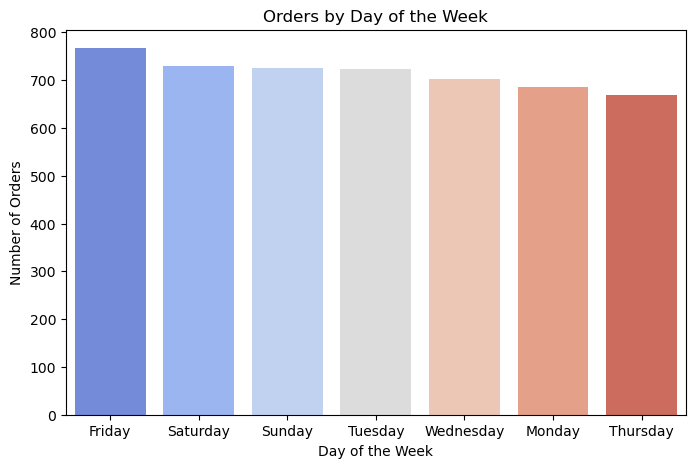

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='order_count', data=daily_orders, palette='coolwarm')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()


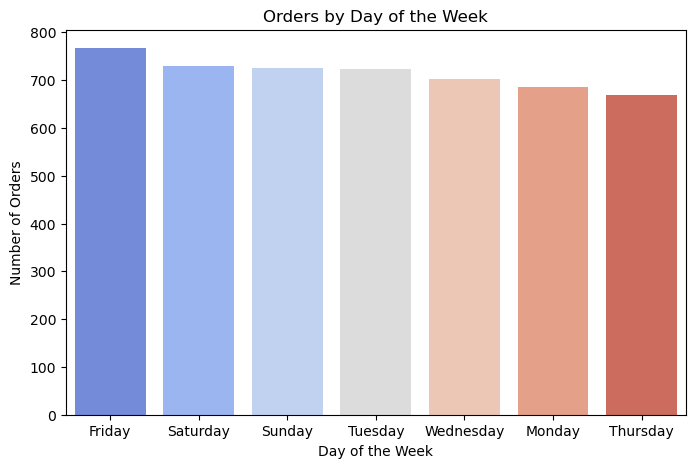

In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='order_count', data=daily_orders, hue='day', palette='coolwarm')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.legend([],[], frameon=False)  # This removes the legend
plt.show()


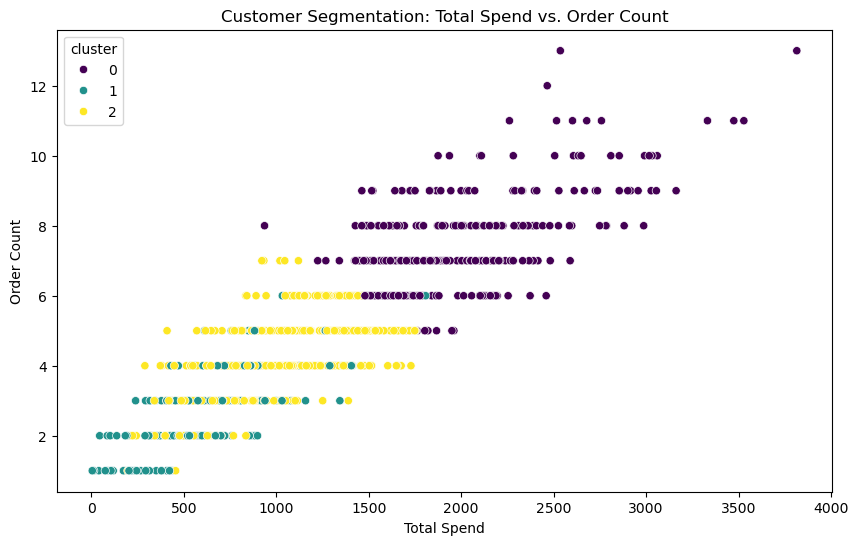

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_spend', 
    y='order_count', 
    hue='cluster', 
    data=customer_metrics, 
    palette='viridis'
)
plt.title('Customer Segmentation: Total Spend vs. Order Count')
plt.xlabel('Total Spend')
plt.ylabel('Order Count')
plt.show()


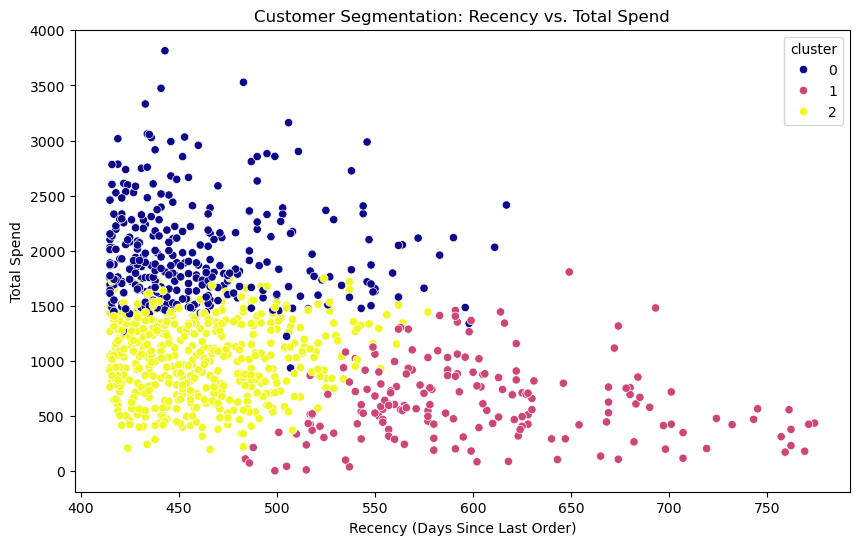

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='recency', 
    y='total_spend', 
    hue='cluster', 
    data=customer_metrics, 
    palette='plasma'
)
plt.title('Customer Segmentation: Recency vs. Total Spend')
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Total Spend')
plt.show()


In [53]:
customer_metrics.to_csv('customer_segments.csv', index=False)


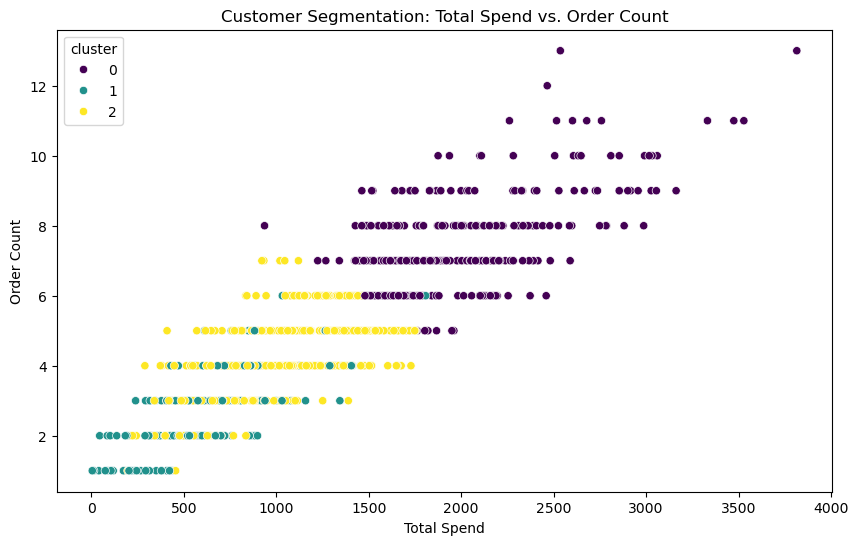

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_spend', 
    y='order_count', 
    hue='cluster', 
    data=customer_metrics, 
    palette='viridis'
)
plt.title('Customer Segmentation: Total Spend vs. Order Count')
plt.xlabel('Total Spend')
plt.ylabel('Order Count')
plt.show()


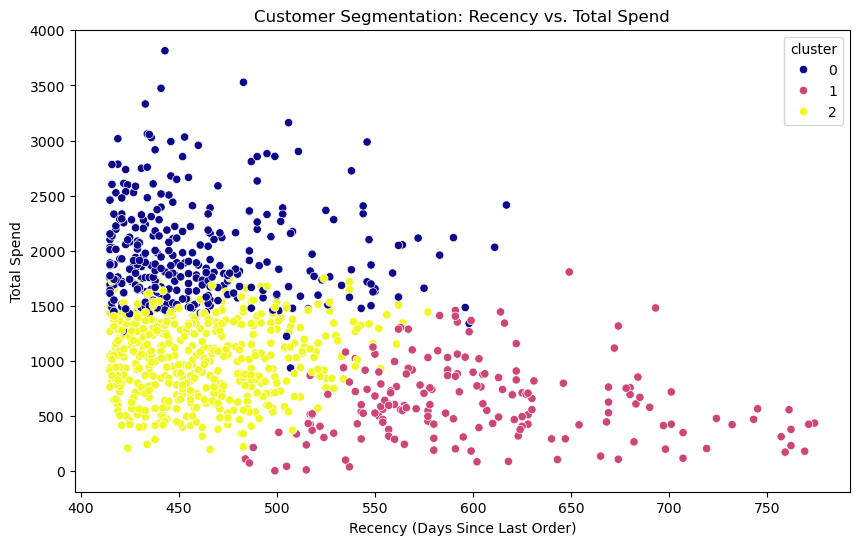

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='recency', 
    y='total_spend', 
    hue='cluster', 
    data=customer_metrics, 
    palette='plasma'
)
plt.title('Customer Segmentation: Recency vs. Total Spend')
plt.xlabel('Recency (Days Since Last Order)')
plt.ylabel('Total Spend')
plt.show()


In [59]:
cluster_summary = customer_metrics.groupby('cluster').mean()[['total_spend', 'order_count', 'recency']]
print(cluster_summary)


         total_spend  order_count     recency
cluster                                      
0        1965.008770     7.447205  459.552795
1         632.633863     2.711111  600.694444
2        1031.579037     4.270707  462.165657


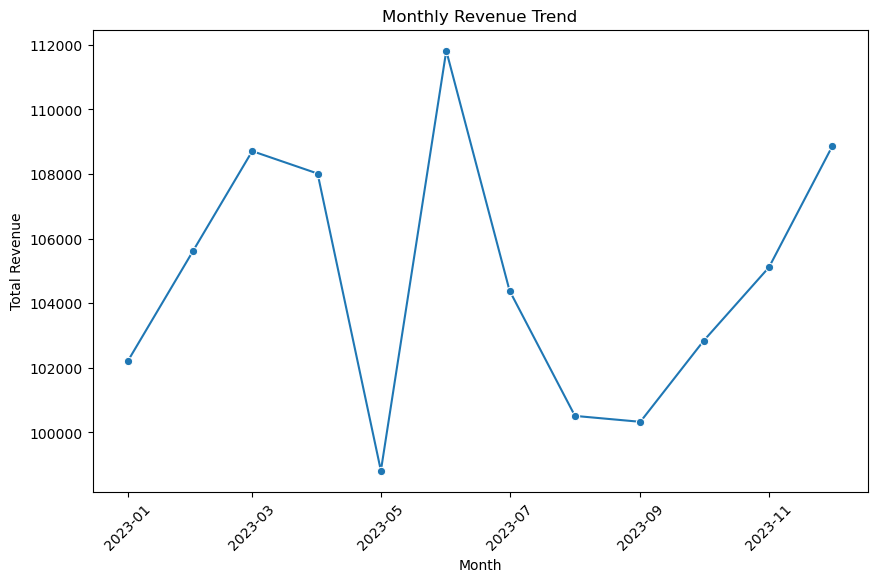

In [61]:
# Convert order_date to a monthly period and then to Timestamp for plotting
orders['order_month'] = orders['order_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate revenue by month
monthly_revenue = orders.groupby('order_month')['total_amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_month', y='total_amount', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


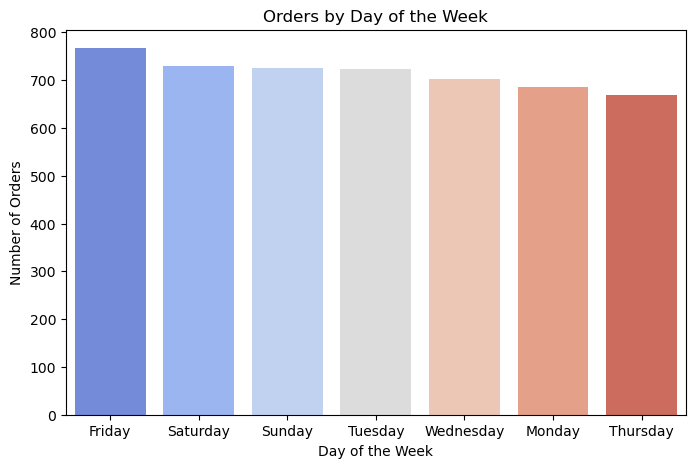

In [63]:
# Extract the day name from order_date
orders['order_day'] = orders['order_date'].dt.day_name()

# Count the number of orders for each day
daily_orders = orders['order_day'].value_counts().reset_index()
daily_orders.columns = ['day', 'order_count']

plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='order_count', data=daily_orders, hue='day', palette='coolwarm')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.legend([],[], frameon=False)  # Remove legend if not needed
plt.show()
